# LDA: Colombia

# Librerias

In [110]:
import pandas as pd 
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix 
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud
import pyLDAvis 
from pyLDAvis import sklearn as sklearnlda

# Análisis preliminar y pre-procesamiento

In [111]:
df=pd.read_excel('col.xlsx', engine='openpyxl')

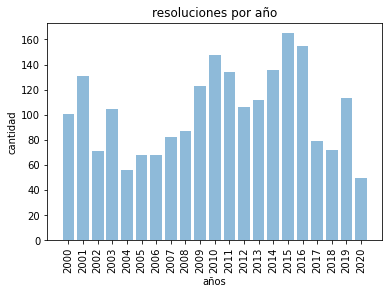

In [112]:
#RESOLUCIONES POR AÑO
df.groupby(["año"])["Resumen"].count()

#RESOLUCIONES POR AÑO, GRÁFICA

resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

In [113]:
#STOP WORDS DEL ESPAÑOL
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')

In [114]:
#ESTANDARIZAR

df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('  +', ' ') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")

palabras_eliminar = ['factores', 'reuters', 'resolución', 'said', 'dominicana', 'republica', "ede", "creg", "resoluciones"]

for i in palabras_eliminar:
    df.Resumen=df.Resumen.str.replace(i, '')
    

# LOOP DEL MODELO


In [115]:
años = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
ntopicos = [8, 7, 9, 10, 7, 7, 12, 8, 8, 10, 9, 10, 7, 10, 10, 6, 10, 5, 6, 6]

In [116]:
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz

In [117]:
for a,n in zip(años, ntopicos):
    
    #leer df por año
    df1 = df.copy()
    num_topics = n
    año = a
    nombre = f"col{a}.html"
    df1=df1[df1["año"]==año]
    print(año, num_topics)
    
    #aplicar la matriz a cada df
    
    tf = tf_vectorizer.fit_transform(df1.Resumen) # Aplico el objeto a un conjunto de textos
    tf = tf_vectorizer.fit_transform(df1.Resumen.head(100))
    # Ahora construiremos la matriz término-documento
    
    
    #aplico modelo
    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1); 
    # Construyo el objeto que es el modelo
    lda.fit(tf);
    
    # Preparo el modelo y sus resultados para la visualización
    LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) 
    pyLDAvis.save_html(LDAvis_prepared, nombre)

2000 8
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
2001 7
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
2002 9
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
2003 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 

In [108]:
# import codecs
# for i in ["00", "01"]:
#     f=codecs.open(f"col20{i}.html", 'r')
#     print(f.read())